# Student's t-test and outliers

We build up on what we learned in the previous problem. Since we are working on larger amounts of data you need to set up scripts/programs to perform the computations repeatedly.

**a)** Create two datasets. We compare the dataset A and B to investigate whether the mean values of dataset A and B are different. **15 Points**

 - Dataset A : 200 sets of 10 random numbers, drawn from a Gaussian of unit variance

 - Dataset B : 200 sets of 10 random numbers, drawn from a combination of two Gaussians - the dominant one of unit variance and the other three times wider. Prepare six cases from no contamination to 50% contaminations with a step of 10%.

*Hint:* Start with all Gaussians having zero mean.

In [13]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

mu = [0,0.1,0.2,0.3,0.4,0.5]
dif_mean = []
SE=np.zeros(6)
i = 0
for m in mu:

    A = np.random.normal(m,1,size = (200,10))
    B1 = np.random.normal(0,1,size=(200,10))
    B2 = np.random.normal(0,3,size=(200,10))
    B=B1+B2
    dif = A-B
    dif_mean.append(A.mean()-B.mean())
    print(str(m)+':  The mean of A ='+str(A.mean()), 'The mean of B ='+ str(B.mean()))
    SE[i] =stats.sem(dif,axis=None,ddof=0)
    i+=1

0:  The mean of A =-0.027774934485099795 The mean of B =-0.11966304958989689
0.1:  The mean of A =0.09344670366155279 The mean of B =0.012941808089738107
0.2:  The mean of A =0.20614703478722046 The mean of B =0.008411576574673908
0.3:  The mean of A =0.31201969327102774 The mean of B =0.02689072368884347
0.4:  The mean of A =0.3874143941518135 The mean of B =-0.0154966169824967
0.5:  The mean of A =0.5165699583949795 The mean of B =0.1298289712765332


Null Hypyothesis: $H_0: \mu_A -\mu_B= 0 $

Alternative Hypothesis: $H_a: \mu_A -\mu_B \neq 0$

$$z_{value} = \frac{(\overline A-\overline B)}{SE}$$


In [2]:
SE

array([0.07542078, 0.07334422, 0.07439175, 0.07472165, 0.075315  ,
       0.07262976])

In [17]:
z_value = np.zeros(6)
p_value = np.zeros(6)
for i in range(6):
    z_value[i] = dif_mean[i]/SE[i]
    p_value[i] = 1-stats.norm.cdf(z_value[i],scale=SE[i])
z_value

array([1.22349383, 1.11908928, 2.64554251, 3.83841192, 5.53822945,
       5.30307819])

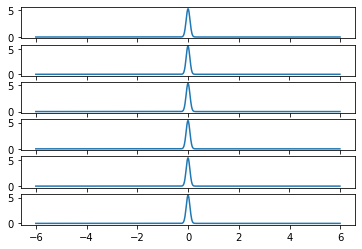

In [25]:
x = np.arange(-6, 6, 0.01)
p_value=[]
fig, axs= plt.subplots(6)
for i in range(6): 
    y=stats.norm.pdf(x, 0, SE[i])
    x1 = np.arange(-6,-z_value[i],0.01)
    x2 = np.arange(z_value[i],6,0.01)
    y1= stats.norm.pdf(x1, 0, SE[i])
    y2= stats.norm.pdf(x2, 0, SE[i])
    axs[i].plot(x,y)
    axs[i].fill_between(x=x1, y1=y1)
    axs[i].fill_between(x=x2, y1=y2)
    

**b)** Perform a t test on sets of 10 observations and investigate what happens as contamination from the wide Gaussian is increased. Compare the effect on the posterior distribution of the difference of the means. **15 Points**

*Hint:* Calculate for each dataset the significance level of some fixed presumed difference in the means. Plot histogram and CDF of the derived significant levels for different contamination cases.

**c.** Now shift the narrow Gaussian in dataset B by half a unit, and repeat the experiment. What effect do the outliers have on our ability to refute the null hypothesis? **15 Points**

**d.** Analyse the same problem with the Bayesian approach. **15 Points**